In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')


In [ ]:
"""Used for discovering categories or clusters in the dataset
STEP 1:   choose the number of K clusters (optimal numbers)
STEP 2: select at random K points, the centroids
STEP 3: assign each data point to the closet centroid --> that forms K clusters
***closest, here refers to EUCLIDEAN DISTANCE or another method
***This is a critical parameter and should be researched
STEP 4: Compute and place the new centroid of each cluster
STEP 5: Reassign each data point to the newclosest centroid """

In [ ]:
"""K-Means Trap IS AVOIDED AUTOMATICally
MUST USE K MEANS ++ ALGORITHM WHICH IS IMPLEMENTED AUTOMTICALLY"""

In [ ]:
"""THE ELBOW METHOD
CHOOSING THE CORRECT NUMBER OF CLUSTERS
The algorithm sums the squared distances between centroid and point
DETERMINES THE OPTIMAL METRIC CALLED THE WCSS"""

In [ ]:
" /Users/jimdoone/Desktop/Machine_Learning__TEMPLATES/K_Means "

In [2]:
%cd /Users/jimdoone/Desktop/Machine_Learning__TEMPLATES/K_Means/

/Users/jimdoone/Desktop/Machine_Learning__TEMPLATES/K_Means


In [3]:
%ls

K_Means_Clustering_James.py     data_preprocessing_template.py
Mall_Customers.csv              kmeans.R
data_preprocessing_template.R   kmeans.py


In [4]:
dataset = pd.read_csv('Mall_Customers.csv')

In [5]:
dataset.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [6]:
X=dataset.iloc[:, 3:5].values

## The ELBOW METHOD
#### Determine optimum number of clusters
    

In [39]:
#  n_clusters : we designate i so that the for loop can determine the optimum # of clusters
#  init= the random initiation method. To avoid the trap, kmeans++
#  max_iter  = maximum number of iterations to find the FINAL CLUSTERS
#  n_init  = The number of times the kmeans algorithm will be run with different centroids
# wcss = in scikit learn is called INERTIA

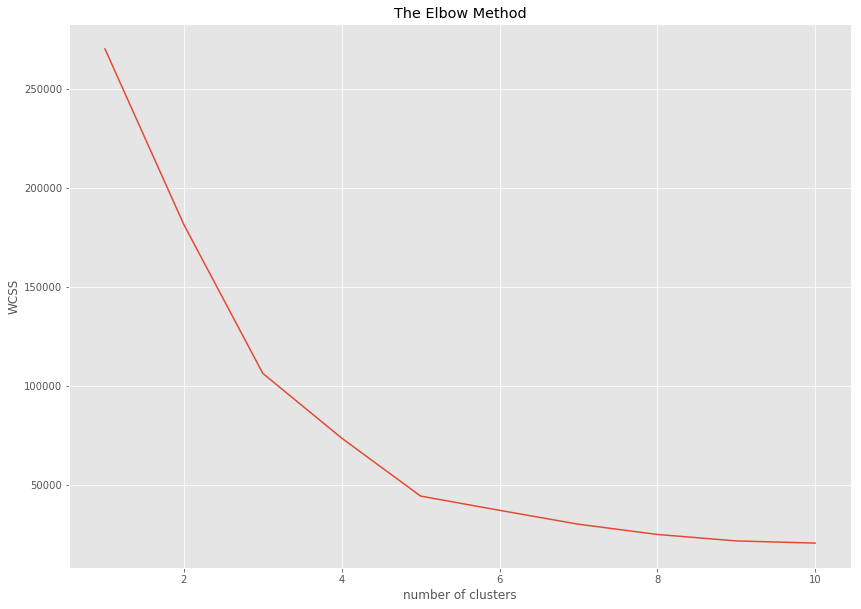

In [7]:
plt.figure(figsize=(14,10))
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init ='k-means++', max_iter=300,
                    n_init=10, random_state =0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11), wcss)
plt.title('The Elbow Method')
plt.xlabel('number of clusters')
plt.ylabel('WCSS')
plt.show()

In [8]:

kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10,
                random_state=0)
y_kmeans = kmeans.fit_predict(X)

In [9]:
y_kmeans

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4,
       3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1, 4, 3,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2], dtype=int32)

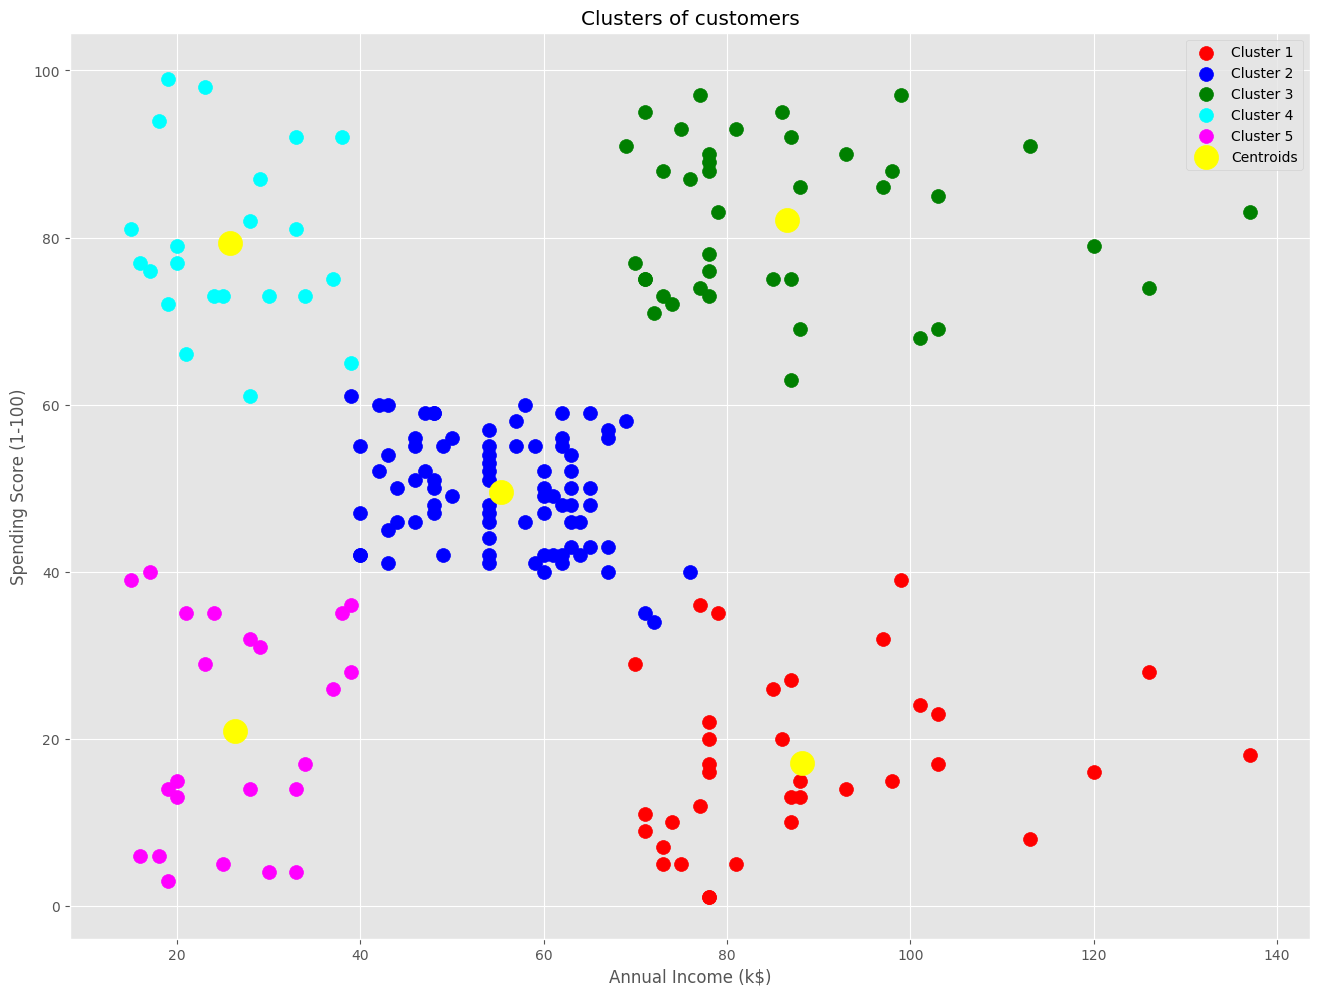

In [10]:
# Visualising the clusters
plt.figure(figsize=(16,12), dpi=100)
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()